We are going to create a simple algorithm in Python that uses the sklearn library to import the isolation forest algorithm.
Here is the plan:

* Generate synthetic data and introduce some noise in it in the form of anomalies.
* Fit the isolation forest algorithm into the data.
* Use the algorithm to detect the anomalies, and plot the results.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

Generate a synthetic time series dataset with anomalies


In [3]:
np.random.seed(42)
n_samples = 500
time = np.arange(n_samples)
data = 0.5 * np.sin(0.2 * time) + np.random.normal(0, 0.1, n_samples)
data[160:170] += 3.0  # Introduce anomalies in the data
data[188:194] += 2.0  # Introduce anomalies in the data
data[400:476] -= 3.0  # Introduce anomalies in the data

Reshape the data into a column vector (required by Isolation Forest)

In [4]:
data = data.reshape(-1, 1)

Create and fit the Isolation Forest model

In [5]:
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
isolation_forest.fit(data)

IsolationForest(contamination=0.05, random_state=42)

Predict anomaly scores for each data point

In [6]:
anomaly_scores = isolation_forest.decision_function(data)

Plot the time series and highlight anomalies

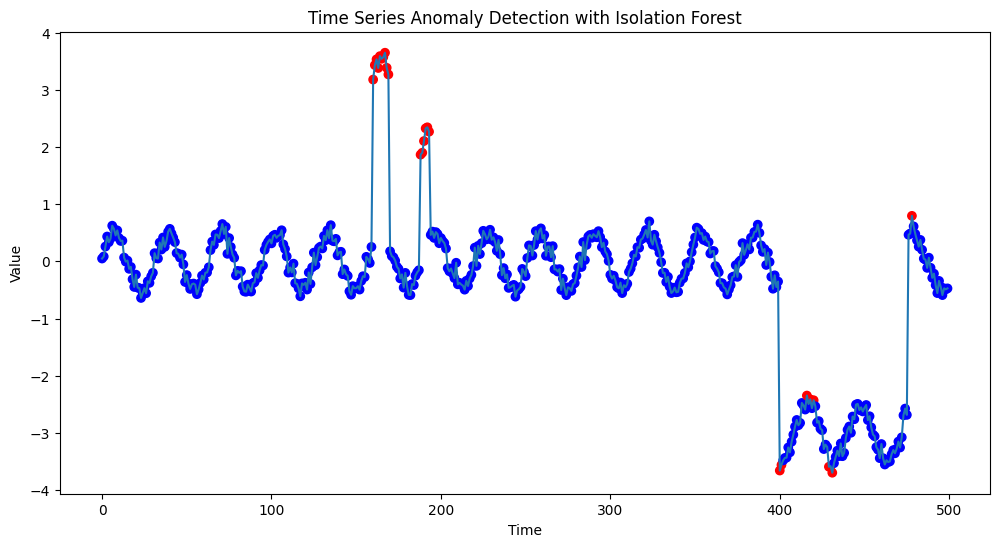

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(time, data)
plt.scatter(time, data, c=np.where(anomaly_scores < 0, 'red', 'blue'), marker='o')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Anomaly Detection with Isolation Forest')
plt.show()

### Detecting Anomalies in the S&P 500 Index
Let’s do the same exercise but on the returns of the S&P 500 index, a US equity benchmark:

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import pandas_datareader as pdr

In [9]:
start_date = '2020-01-01'
end_date   = '2023-01-01'

# Import the data
data = (pdr.get_data_fred('SP500', start = start_date, end = end_date).dropna())
data_diff = data.diff().dropna()
time = np.arange(len(data_diff))

# Reshape the data into a column vector (required by Isolation Forest)
data_diff = np.reshape(np.array(data_diff), (-1))
data_diff = data_diff.reshape(-1, 1)

# Create and fit the Isolation Forest model
isolation_forest = IsolationForest(contamination = 0.05, random_state = 0)
isolation_forest.fit(data_diff)

# Predict anomaly scores for each data point
anomaly_scores = isolation_forest.decision_function(data_diff)

Plot the results

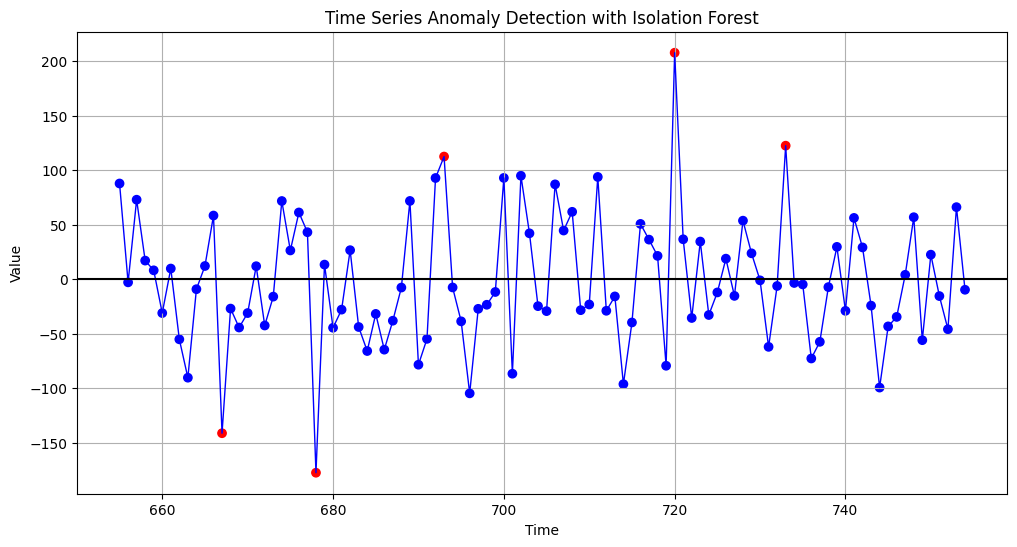

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(time[-100:], data_diff[-100:], color = 'blue', linewidth = 1)
plt.scatter(time[-100:], data_diff[-100:], c=np.where(anomaly_scores[-100:] < 0, 'red', 'blue'), marker='o')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Anomaly Detection with Isolation Forest')
plt.axhline(y = 0, color = 'black')
plt.grid()
plt.show()

It seems like the isolation forest algorithm is a good choice for anomaly detection in time series.